Importing all the necessary libraries

In [1]:
import plotly.graph_objs as go
import plotly.io as pio
import plotly.express as px
import pandas as pd
import matplotlib.pyplot as plt
import plotly.offline as py
py.init_notebook_mode(connected=True)
pio.renderers.default = 'colab'

Importing the dataset 

In [2]:
dataset1 = pd.read_csv("covid.csv")
dataset1.head()

Country/Region      Continent    Population  TotalCases  NewCases  \
0            USA  North America  3.311981e+08     5032179       NaN   
1         Brazil  South America  2.127107e+08     2917562       NaN   
2          India           Asia  1.381345e+09     2025409       NaN   
3         Russia         Europe  1.459409e+08      871894       NaN   
4   South Africa         Africa  5.938157e+07      538184       NaN   

   TotalDeaths  NewDeaths  TotalRecovered  NewRecovered  ActiveCases  \
0     162804.0        NaN       2576668.0           NaN    2292707.0   
1      98644.0        NaN       2047660.0           NaN     771258.0   
2      41638.0        NaN       1377384.0           NaN     606387.0   
3      14606.0        NaN        676357.0           NaN     180931.0   
4       9604.0        NaN        387316.0           NaN     141264.0   

   Serious,Critical  Tot Cases/1M pop  Deaths/1M pop  TotalTests  \
0           18296.0           15194.0          492.0  63139605.0   
1            8318.0           13716.0          464.0  13206188.0   
2            8944.0            1466.0           30.0  22149351.0   
3            2300.0            5974.0          100.0  29716907.0   
4             539.0            9063.0          162.0   3149807.0   

   Tests/1M pop      WHO Region iso_alpha  
0      190640.0        Americas       USA  
1       62085.0        Americas       BRA  
2       16035.0  South-EastAsia       IND  
3      203623.0          Europe       RUS  
4       53044.0          Africa       ZAF

Getting more information about the dataset

In [3]:
print(dataset1.shape)
print(dataset1.size)

(209, 17)
3553


In [4]:
dataset1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209 entries, 0 to 208
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Country/Region    209 non-null    object 
 1   Continent         208 non-null    object 
 2   Population        208 non-null    float64
 3   TotalCases        209 non-null    int64  
 4   NewCases          4 non-null      float64
 5   TotalDeaths       188 non-null    float64
 6   NewDeaths         3 non-null      float64
 7   TotalRecovered    205 non-null    float64
 8   NewRecovered      3 non-null      float64
 9   ActiveCases       205 non-null    float64
 10  Serious,Critical  122 non-null    float64
 11  Tot Cases/1M pop  208 non-null    float64
 12  Deaths/1M pop     187 non-null    float64
 13  TotalTests        191 non-null    float64
 14  Tests/1M pop      191 non-null    float64
 15  WHO Region        184 non-null    object 
 16  iso_alpha         209 non-null    object 
dt

Importing other Dataset

In [5]:
dataset2=pd.read_csv("covid_grouped.csv")
dataset2.head()

Date Country/Region  Confirmed  Deaths  Recovered  Active  New cases  \
0  2020-01-22    Afghanistan          0       0          0       0          0   
1  2020-01-22        Albania          0       0          0       0          0   
2  2020-01-22        Algeria          0       0          0       0          0   
3  2020-01-22        Andorra          0       0          0       0          0   
4  2020-01-22         Angola          0       0          0       0          0   

   New deaths  New recovered             WHO Region iso_alpha  
0           0              0  Eastern Mediterranean       AFG  
1           0              0                 Europe       ALB  
2           0              0                 Africa       DZA  
3           0              0                 Europe       AND  
4           0              0                 Africa       AGO

In [6]:
print(dataset2.shape)
print(dataset2.size)

(35156, 11)
386716


In [7]:
dataset2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35156 entries, 0 to 35155
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Date            35156 non-null  object
 1   Country/Region  35156 non-null  object
 2   Confirmed       35156 non-null  int64 
 3   Deaths          35156 non-null  int64 
 4   Recovered       35156 non-null  int64 
 5   Active          35156 non-null  int64 
 6   New cases       35156 non-null  int64 
 7   New deaths      35156 non-null  int64 
 8   New recovered   35156 non-null  int64 
 9   WHO Region      35156 non-null  object
 10  iso_alpha       35156 non-null  object
dtypes: int64(7), object(4)
memory usage: 3.0+ MB


Initializing the Data Cleaning Process 

In [8]:
dataset1.columns

Index(['Country/Region', 'Continent', 'Population', 'TotalCases', 'NewCases',
       'TotalDeaths', 'NewDeaths', 'TotalRecovered', 'NewRecovered',
       'ActiveCases', 'Serious,Critical', 'Tot Cases/1M pop', 'Deaths/1M pop',
       'TotalTests', 'Tests/1M pop', 'WHO Region', 'iso_alpha'],
      dtype='object')

'NewCases', 'NewDeaths', 'NewRecovered' columns are dropped as they contains NAN values.

In [9]:
dataset1.drop(['NewCases','NewDeaths','NewRecovered'], axis=1,inplace=True)
dataset1.sample(5)

Country/Region      Continent  Population  TotalCases  TotalDeaths  \
140         Cyprus           Asia   1208238.0        1208         19.0   
105       Zimbabwe         Africa  14883803.0        4339         84.0   
122      Lithuania         Europe   2718121.0        2171         81.0   
6             Peru  South America  33016319.0      455409      20424.0   
11              UK         Europe  67922029.0      308134      46413.0   

     TotalRecovered  ActiveCases  Serious,Critical  Tot Cases/1M pop  \
140           856.0        333.0               NaN            1000.0   
105          1264.0       2991.0               NaN             292.0   
122          1656.0        434.0               6.0             799.0   
6          310337.0     124648.0            1426.0           13793.0   
11              NaN          NaN              73.0            4537.0   

     Deaths/1M pop  TotalTests  Tests/1M pop WHO Region iso_alpha  
140           16.0    216597.0      179267.0     Europe       CYP  
105            6.0    140421.0        9434.0     Africa       ZWE  
122           30.0    540784.0      198955.0     Europe       LTU  
6            619.0   2493429.0       75521.0   Americas       PER  
11           683.0  17515234.0      257873.0     Europe       UKR

Creating table using Plotly Express

In [10]:
from plotly.figure_factory import create_table

colorscale = [[0, '#4d004c'], [.5, '#f2e5ff'], [1, '#ffffff']]
table = create_table(dataset1.head(15), colorscale=colorscale)
py.iplot(table)

Bar graphs- Comparisons between COVID infected countries in terms of total cases, total deaths, total recovered & total tests

Bar graphs showing Total Cases

In [11]:
px.bar(dataset1.head(15), x = 'Country/Region', 
       y = 'TotalCases',color = 'TotalCases', 
       height = 500,hover_data = ['Country/Region', 'Continent'])

Ploting Bar Graph by colouring the total deaths 

In [12]:
px.bar(dataset1.head(15), x= 'Country/Region', y = 'TotalCases', color = 'TotalDeaths', height = 500, hover_data = ['Country/Region', 'Continent'])

Ploting Bar Graph by colouring the total Test

In [13]:
px.bar(dataset1.head(15), x = 'Country/Region', y = 'TotalCases', color = 'TotalTests', height = 500, hover_data = ['Country/Region' , 'Continent'])

Data Visualization through Bubble Charts-Continent Wise 

Scatter plot

In [14]:
px.scatter(dataset1, x='Continent',y='TotalCases', 
           hover_data=['Country/Region', 'Continent'], 
           color='TotalCases', size='TotalCases', size_max=80)

log_y= True, the histogram axis (not the returned parameter) is in log scale. The return parameter (n, bins), i.e. the values of bins and sides of bins are the same for log=True and log=False. This means both n==n2 and bins==bins2 are true

In [15]:
px.scatter(dataset1.head(57), x = 'Continent', y = 'TotalCases', hover_data = ['Country/Region', 'Continent'], color = 'TotalCases', size = 'TotalCases', size_max = 80, log_y = True)

Data Visualization through Bubble Charts-Country Wise

Bubble Chart

In [16]:
px.scatter(dataset1.head(100), x='Country/Region', y='TotalCases', hover_data = ['Country/Region', 'Continent'], color='TotalCases', size='TotalCases', size_max = 80)

Country/Region with respect to the total number of cases for top 30 countries

In [17]:
px.scatter(dataset1.head(30), x='Country/Region', y='TotalCases', hover_data=['Country/Region','Continent'], color='Country/Region', size='TotalCases', size_max = 80, log_y = True)

Advanced Data Visualization- Bar graphs for All top infected Countries

In [18]:
px.bar(dataset2, x = "Date", y = "Confirmed", color="Confirmed", hover_data=["Confirmed", "Date", "Country/Region"], height = 400)

In [19]:
px.bar(dataset2, x = "Date", y = "Confirmed", color="Confirmed", hover_data=["Confirmed", "Date", "Country/Region"], log_y=True, height = 400)

In [20]:
px.bar(dataset2, x="Date", y="Deaths", color="Deaths", 
       hover_data=["Confirmed", "Date", "Country/Region"],
       log_y=False, height=400)

Countries Specific COVID Data Visualization: (United States)

Refining dataset to get only USA data 

In [21]:
df_US = dataset2.loc[dataset2['Country/Region']=='US']

In [22]:
px.bar(df_US, x='Date',y='Confirmed',color='Confirmed', height=400)

In [23]:
px.bar(df_US, x='Date',y='Recovered',color='Recovered', height=400)

Line plot

In [24]:
px.line(df_US, x='Date', y='Recovered', height=400)

In [25]:
px.line(df_US, x='Date', y='Deaths', height=400)

In [26]:
px.line(df_US, x='Date', y='Confirmed',height=400)

In [27]:
px.bar(df_US, x='Date', y='New cases', height=400)

In [28]:
px.scatter(df_US, x='Confirmed', y='Deaths', height=400)

Visualization of Data in terms of Maps

In [29]:
px.choropleth(dataset2,
              locations="iso_alpha",
              color="Confirmed",
              hover_name="Country/Region", 
              color_continuous_scale="Blues",
              animation_frame="Date")

Natural earth projection

In [30]:
px.choropleth(dataset2, locations='iso_alpha',color='Recovered', hover_name= 'Country/Region', color_continuous_scale="RdYlGn", projection='natural earth', animation_frame='Date')

Bar Graph Annimation

In [31]:
px.bar(dataset2, x="WHO Region", y="Confirmed", color="WHO Region", 
       animation_frame="Date", hover_name="Country/Region")

Visualize text using Word Cloud

Importing Dataset

In [32]:
dataset3= pd.read_csv("coviddeath.csv")
dataset3.head()

Data as of  Start Week    End Week State       Condition Group  \
0  08/30/2020  02/01/2020  08/29/2020    US  Respiratory diseases   
1  08/30/2020  02/01/2020  08/29/2020    US  Respiratory diseases   
2  08/30/2020  02/01/2020  08/29/2020    US  Respiratory diseases   
3  08/30/2020  02/01/2020  08/29/2020    US  Respiratory diseases   
4  08/30/2020  02/01/2020  08/29/2020    US  Respiratory diseases   

                 Condition ICD10_codes Age Group  Number of COVID-19 Deaths  \
0  Influenza and pneumonia     J09-J18      0-24                      122.0   
1  Influenza and pneumonia     J09-J18     25-34                      596.0   
2  Influenza and pneumonia     J09-J18     35-44                     1521.0   
3  Influenza and pneumonia     J09-J18     45-54                     4186.0   
4  Influenza and pneumonia     J09-J18     55-64                    10014.0   

  Flag  
0  NaN  
1  NaN  
2  NaN  
3  NaN  
4  NaN

Dataset information

In [33]:
dataset3.tail()

Data as of  Start Week    End Week State           Condition Group  \
12255  08/30/2020  02/01/2020  08/29/2020    YC  Coronavirus Disease 2019   
12256  08/30/2020  02/01/2020  08/29/2020    YC  Coronavirus Disease 2019   
12257  08/30/2020  02/01/2020  08/29/2020    YC  Coronavirus Disease 2019   
12258  08/30/2020  02/01/2020  08/29/2020    YC  Coronavirus Disease 2019   
12259  08/30/2020  02/01/2020  08/29/2020    YC  Coronavirus Disease 2019   

      Condition ICD10_codes   Age Group  Number of COVID-19 Deaths  \
12255  COVID-19        U071       65-74                     5024.0   
12256  COVID-19        U071       75-84                     5381.0   
12257  COVID-19        U071         85+                     4841.0   
12258  COVID-19        U071  Not stated                        NaN   
12259  COVID-19        U071    All ages                    20628.0   

                                  Flag  
12255                              NaN  
12256                              NaN  
12257                              NaN  
12258  Counts less than 10 suppressed.  
12259                              NaN

In [34]:
dataset3.groupby(["Condition"]).count()

Data as of  Start Week  \
Condition                                                                    
Adult respiratory distress syndrome                        540         540   
All other conditions and causes (residual)                 540         540   
Alzheimer disease                                          530         530   
COVID-19                                                   540         540   
Cardiac arrest                                             520         520   
Cardiac arrhythmia                                         540         540   
Cerebrovascular diseases                                   530         530   
Chronic lower respiratory diseases                         540         540   
Diabetes                                                   540         540   
Heart failure                                              540         540   
Hypertensive diseases                                      540         540   
Influenza and pneumonia                                    540         540   
Intentional and unintentional injury, poisoning...         520         520   
Ischemic heart disease                                     540         540   
Malignant neoplasms                                        540         540   
Obesity                                                    530         530   
Other diseases of the circulatory system                   530         530   
Other diseases of the respiratory system                   540         540   
Renal failure                                              540         540   
Respiratory arrest                                         480         480   
Respiratory failure                                        540         540   
Sepsis                                                     530         530   
Vascular and unspecified dementia                          530         530   

                                                    End Week  State  \
Condition                                                             
Adult respiratory distress syndrome                      540    540   
All other conditions and causes (residual)               540    540   
Alzheimer disease                                        530    530   
COVID-19                                                 540    540   
Cardiac arrest                                           520    520   
Cardiac arrhythmia                                       540    540   
Cerebrovascular diseases                                 530    530   
Chronic lower respiratory diseases                       540    540   
Diabetes                                                 540    540   
Heart failure                                            540    540   
Hypertensive diseases                                    540    540   
Influenza and pneumonia                                  540    540   
Intentional and unintentional injury, poisoning...       520    520   
Ischemic heart disease                                   540    540   
Malignant neoplasms                                      540    540   
Obesity                                                  530    530   
Other diseases of the circulatory system                 530    530   
Other diseases of the respiratory system                 540    540   
Renal failure                                            540    540   
Respiratory arrest                                       480    480   
Respiratory failure                                      540    540   
Sepsis                                                   530    530   
Vascular and unspecified dementia                        530    530   

                                                    Condition Group  \
Condition                                                             
Adult respiratory distress syndrome                             540   
All other conditions and causes (residual)                      540   
Alzheimer disease                        

Creating wordcloud

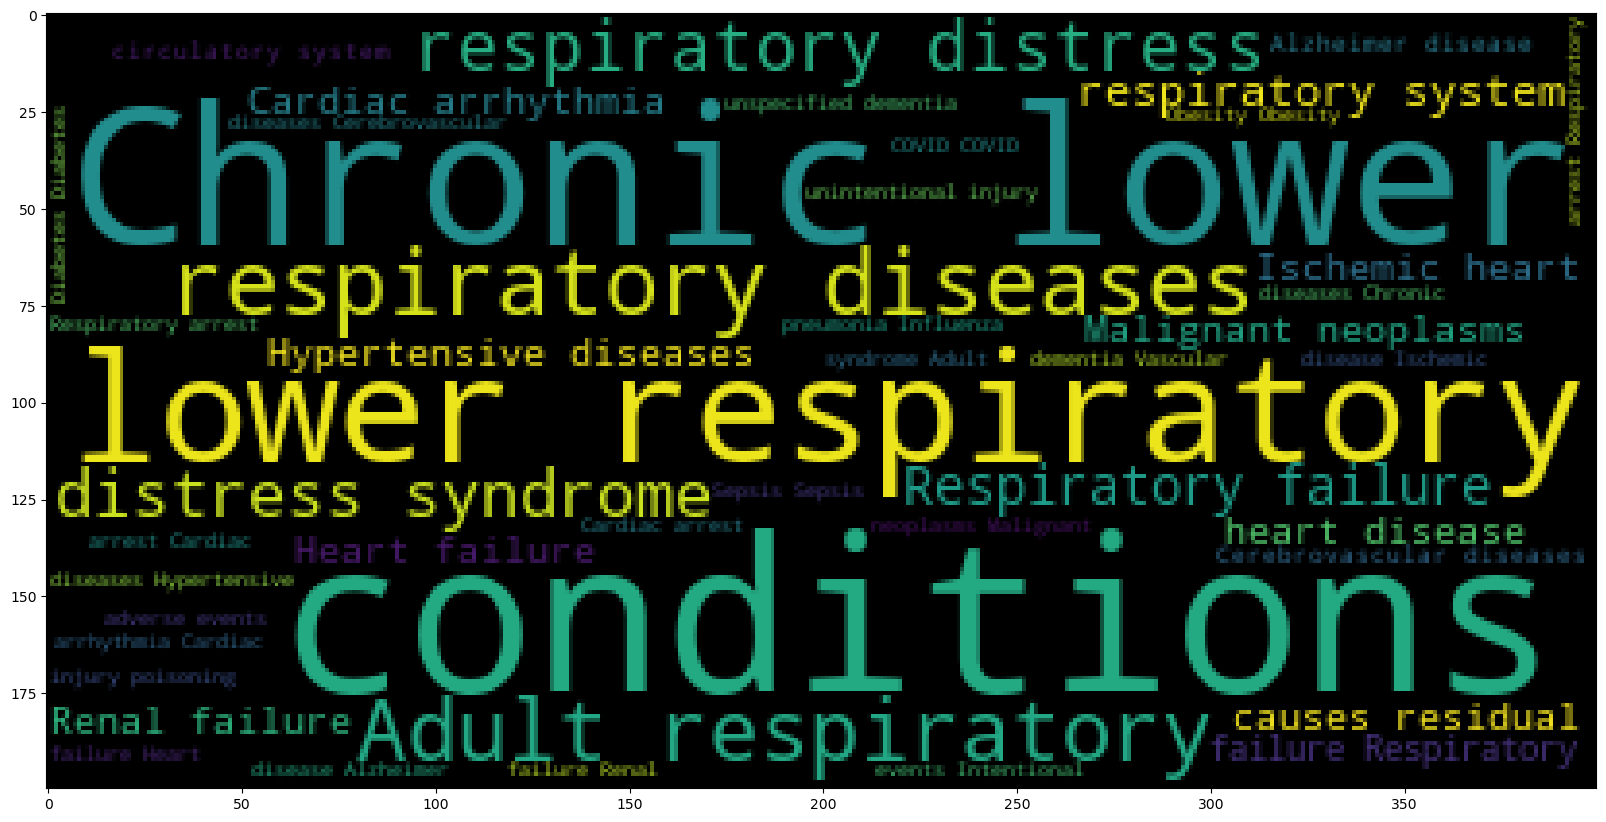

In [36]:
# import word cloud
from wordcloud import WordCloud

sentences = dataset3["Condition"].tolist()
sentences_as_a_string = ' '.join(sentences)


# Convert the string into WordCloud
plt.figure(figsize=(20, 20))
plt.imshow(WordCloud().generate(sentences_as_a_string))

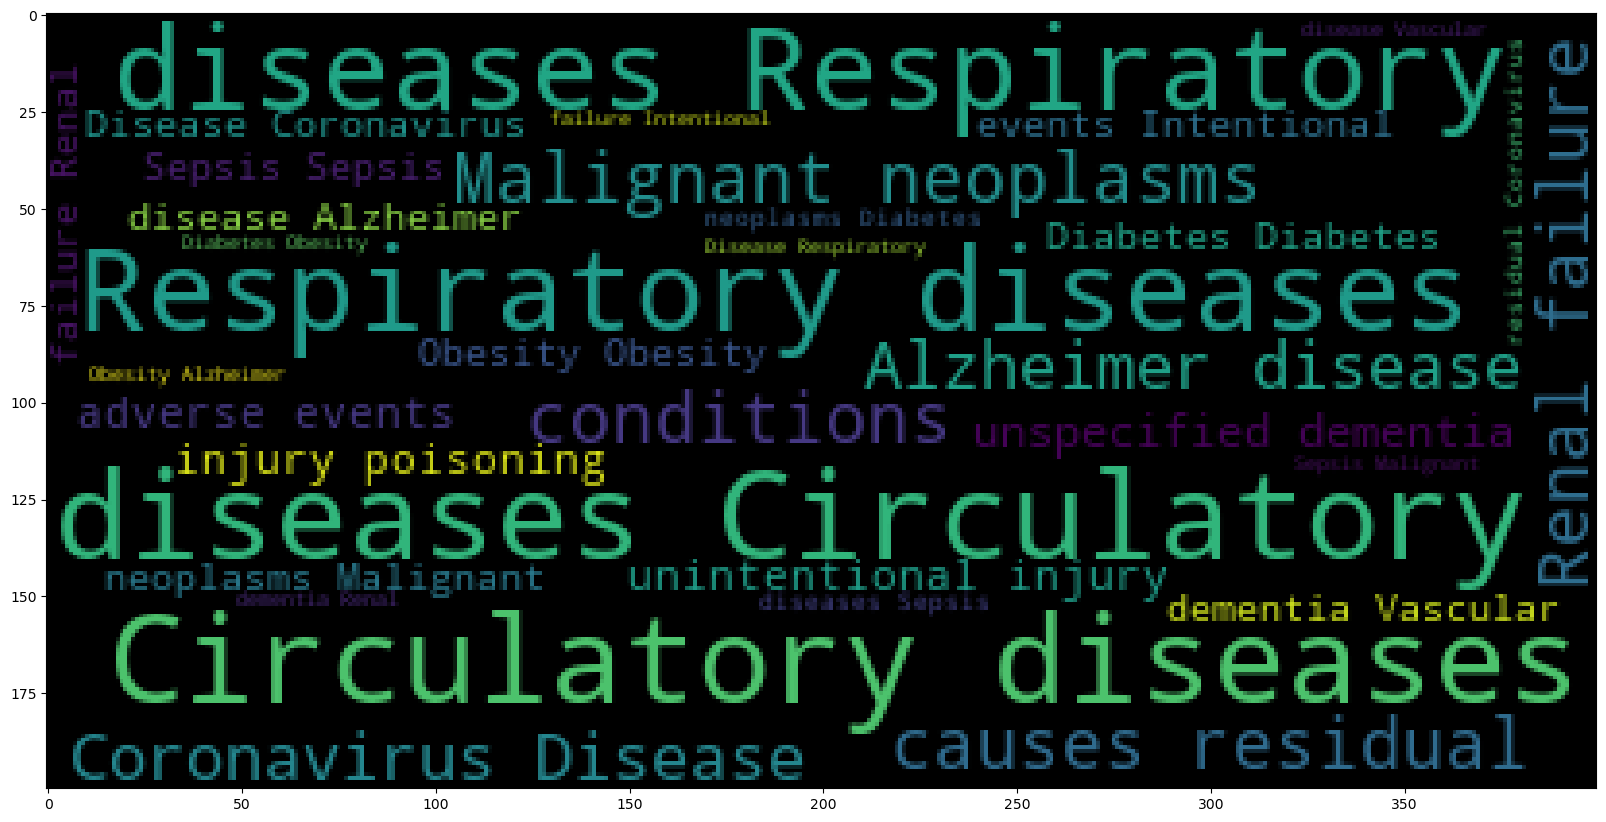

In [37]:
column2_tolist= dataset3["Condition Group"].tolist()

# Convert the list to one single string
column_to_string= " ".join(column2_tolist)

# Convert the string into WordCloud
plt.figure(figsize=(20,20))
plt.imshow(WordCloud().generate(column_to_string))